In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.arima_model import ARIMA
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
#Importando o Data Frame da Petrobrás, formatar a data e transformar em série 
petro = pd.read_csv("PETR4.SA.csv", sep = ",")
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
petro = pd.read_csv("PETR4.SA.csv", sep = ",", parse_dates = ['Date'], index_col = 'Date', date_parser = dateparse)
petro.index
ts = petro["Close"]

Text(0.5,0,'Anos')

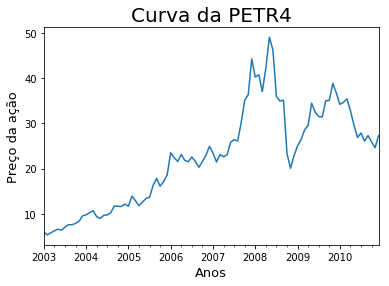

In [3]:
ts.plot()
plt.title("Curva da PETR4", size = 20)
plt.ylabel("Preço da ação", size = 13)
plt.xlabel ("Anos", size = 13)

In [4]:
#Realizando o mesmo procedimento com o data set do índice Ibovespa
ibov = pd.read_csv("ibov.csv", sep = ",")
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
ibov = pd.read_csv("ibov.csv", sep = ",", parse_dates = ['Date'], index_col = 'Date', date_parser = dateparse)
ibov.index
tsIBOV = ibov["Close"]

Text(0.5,0,'Anos')

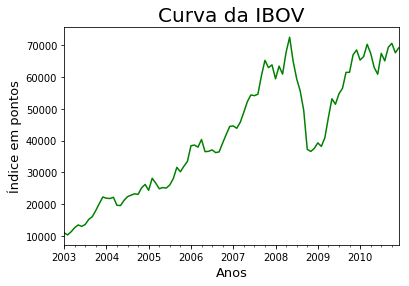

In [5]:
#Plotando o gráfico da série temporal da IBOV
tsIBOV.plot(color = "green" )
plt.title("Curva da IBOV", size = 20)
plt.ylabel("Índice em pontos", size = 13)
plt.xlabel ("Anos", size = 13)

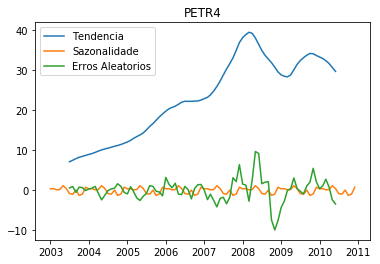

In [6]:
#Mostrando os gráficos de tendência, sazionalidade e dos erros aleatórios da PETR4
decomposicao = seasonal_decompose(ts)
tendencia = decomposicao.trend
sazonal = decomposicao.seasonal
aleatorio = decomposicao.resid
plt.plot(tendencia, label = "Tendencia")
plt.plot(sazonal, label = "Sazonalidade")
plt.plot(aleatorio, label = "Erros Aleatorios")
plt.title("PETR4")
plt.legend()

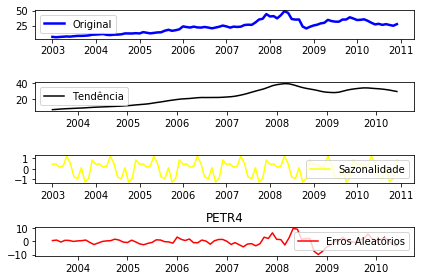

In [7]:
#Separando os gráficos, temos:
plt.subplot(4,1,1)
plt.plot(ts, label = "Original", color = "blue", linewidth=2.5)
plt.legend(loc = "best" )

plt.subplot(4,1,2)
plt.plot(tendencia, label = "Tendência", color = "black")
plt.legend(loc = "best" )

plt.subplot(4,1,3)
plt.plot(sazonal, label = "Sazonalidade", color="yellow")
plt.legend(loc = "best" )

plt.subplot(4,1,4)
plt.plot(aleatorio, label = "Erros Aleatórios", color = "red")
plt.legend(loc = "best" )
plt.title("PETR4")
plt.tight_layout()

Text(0.5,1,'IBOV')

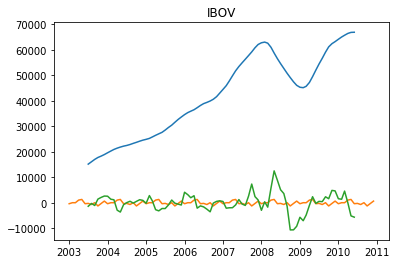

In [8]:
#Realizei o mesmo procedimento para a série temporal IBOV
decomposicaoIBOV = seasonal_decompose(tsIBOV)
tendenciaIBOV = decomposicaoIBOV.trend
sazonalIBOV = decomposicaoIBOV.seasonal
aleatorioIBOV = decomposicaoIBOV.resid

plt.plot(tendenciaIBOV)
plt.plot(sazonalIBOV)
plt.plot(aleatorioIBOV)
plt.title("IBOV")

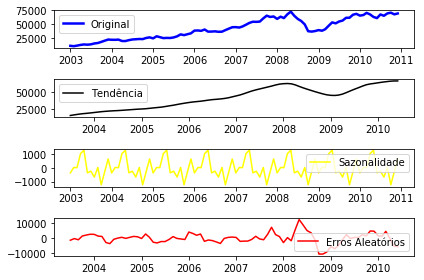

In [9]:
plt.subplot(4,1,1)
plt.plot(tsIBOV, label = "Original", color = "blue", linewidth=2.5)
plt.legend(loc = "best" )

plt.subplot(4,1,2)
plt.plot(tendenciaIBOV, label = "Tendência", color = "black")
plt.legend(loc = "best" )

plt.subplot(4,1,3)
plt.plot(sazonalIBOV, label = "Sazonalidade", color="yellow")
plt.legend(loc = "best" )

plt.subplot(4,1,4)
plt.plot(aleatorioIBOV, label = "Erros Aleatórios", color = "red")
plt.legend(loc = "best" )
plt.tight_layout()

<h2 style="color:blue">As séries temporais temporais parecem ser não estacionárias. Utilizei o ACF Test (Auto-Correlation Function) para constatar se há auto correlação.</h2>

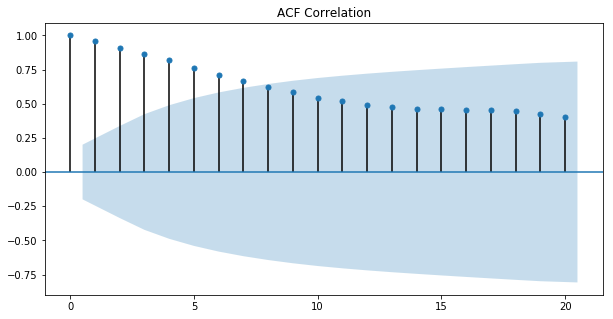

In [10]:
gpetro = plot_acf(ts, title="ACF Correlation")
gpetro.set_figheight(5)
gpetro.set_figwidth(10)

Analisando o plot de correlação ACF, verifiquei que o seu valor decresce lentamente e constantemente, essa característica é típica de uma série temporal não estacionaria. Para transformar a série temporal não estacionária em estacionaria, basta diferenciá-la 'n' ordens, até que o resultado seja uma série temporal estacionaria.

In [11]:
ocorrencias_diff = ts.diff(periods=1)
ocorrencias_diff = ocorrencias_diff[1:]

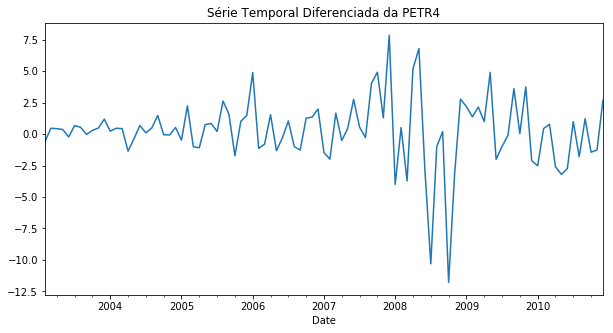

In [12]:
#Gráfico da série temporal diferenciada com D = 1
gpetro = ocorrencias_diff.plot(figsize=(10,5), title="Série Temporal Diferenciada da PETR4", legend=False)

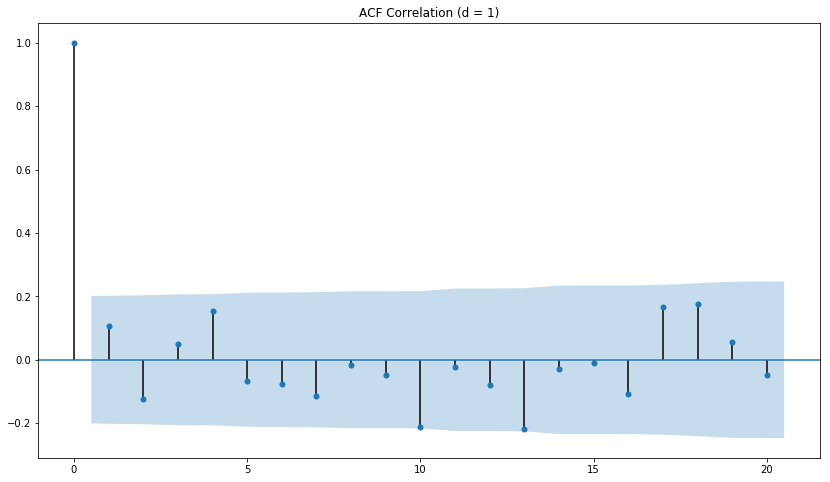

In [13]:
#Gráfico de correlação ACF (em 1ª diferença)

gpetro = plot_acf(ocorrencias_diff, title="ACF Correlation (d = 1)")
gpetro.set_figheight(8)
gpetro.set_figwidth(14)

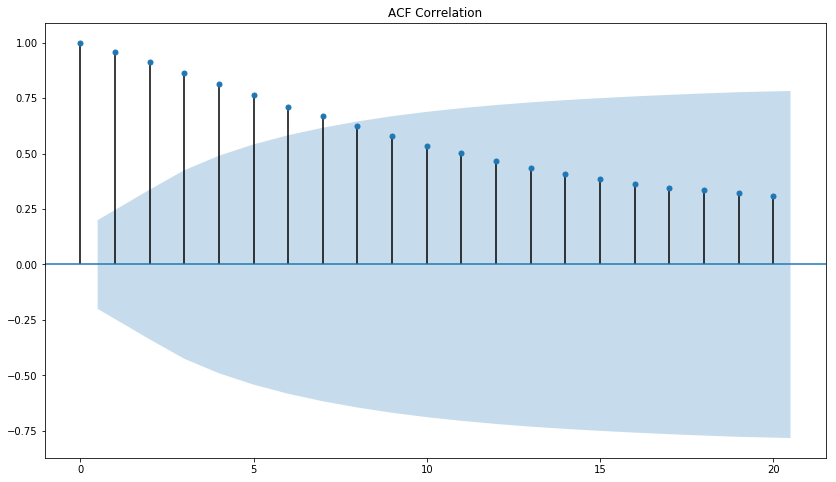

In [14]:
#Realizando o mesmo procedimento para a série temporal do índice IBOVESPA
gibov = plot_acf(tsIBOV, title="ACF Correlation")
gibov.set_figheight(8)
gibov.set_figwidth(14)

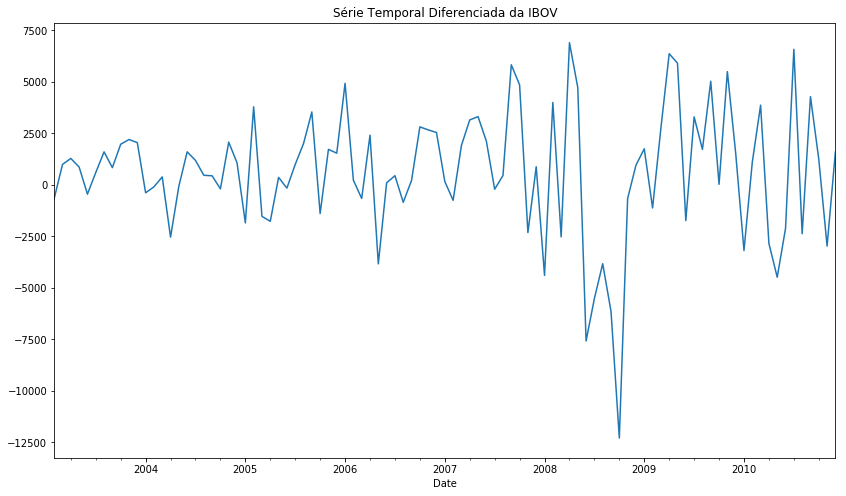

In [15]:
ocorrencias_diffibov = tsIBOV.diff(periods=1)
ocorrencias_diffibov = ocorrencias_diffibov[1:]
gibov = ocorrencias_diffibov.plot(figsize=(14,8), title="Série Temporal Diferenciada da IBOV", legend=False)

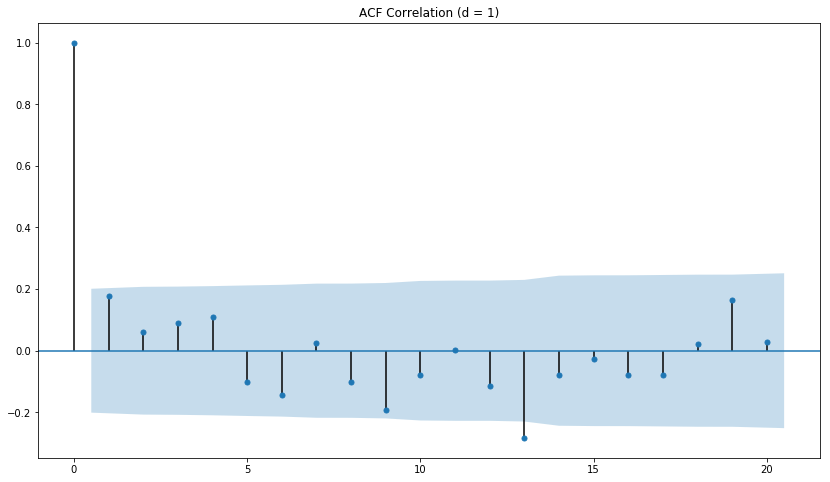

In [16]:
gibov = plot_acf(ocorrencias_diffibov, title="ACF Correlation (d = 1)")
gibov.set_figheight(8)
gibov.set_figwidth(14)

In [17]:
"""Transformando ambas as séries temporais em primeira diferença e analisando os resultados (pelo método dos mínimos quadrados ordinários) da equação da reta de regressão, do coeficiente de regressão linear e de alguns testes, a exemplo do Jarque-Bera e Durbin-Watson, entre outras estatísticas pertinentes)""" 
petroDiff = ts.diff().values[1:]
ibovDiff = tsIBOV.diff().values[1:]
petroDiff = petroDiff.reshape(-1,1)
ibovDiff = ibovDiff.reshape(-1,1)
x_smDiff = sm.add_constant(petroDiff)
resultsDiff = sm.OLS(ibovDiff, x_smDiff).fit()
resultsDiff.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     129.8
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           2.43e-19
Time:                        15:39:47   Log-Likelihood:                -857.17
No. Observations:                  95   AIC:                             1718.
Df Residuals:                      93   BIC:                             1723.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        416.4630    208.737      1.995      0.049       1.953     830.973
x1           880.5111     77.282     11.394      0.000     727.045    1033.977
==============================================================================
Omnibus:                       12.011   Durbin-Watson:                   1.690
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               19.553
Skew:                          -0.511   Prob(JB):                     5.68e-05
Kurtosis:                       4.974   Cond. No.                         2.71
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

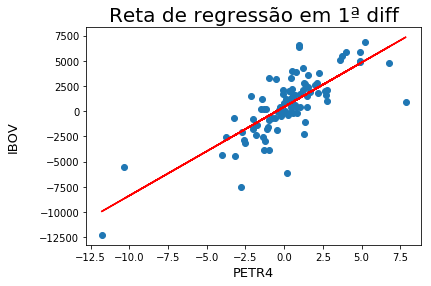

In [18]:
#Plotando o gráfico da reta de regressão com as variáveis em primeira diferença.
resultsDiff.predict(x_smDiff)
plt.scatter(petroDiff,ibovDiff)
plt.plot(petroDiff, resultsDiff.predict(x_smDiff), color = "red")
plt.title("Reta de regressão em 1ª diff", size = 20)
plt.xlabel("PETR4", size = 13)
plt.ylabel("IBOV\n", size = 13)
plt.show()

Na monografia eu decompus algumas estatísticas que mostrei resumida aqui. Também realizei uma transformação das séries temporais para logaritmo natural (Ln) para mostrar em porcentagem o impacto que a Petrobrás causou na IBOV.